<a href="https://colab.research.google.com/github/carmeniturbe/ejercicios_Machine_Learning/blob/main/Ejercicio_m%C3%A9tricas_de_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este enlace contiene información sobre los precios de casa en el área de Boston en 1978.  Es una versión modificada de un conjunto de datos clásico que se usa para introducir el aprendizaje automático.  A continuación, se muestra el diccionario de datos para este conjunto de datos:

          CRIM     índice de criminalidad per cápita por ciudad

          NOX      concentración de óxidos nítricos (partes por 10 millones)

          RM       número promedio de habitaciones por vivienda

          AGE      proporción de unidades ocupadas por sus propietarios construidas antes de 1940

          PTRATIO  proporción de alumnos por profesor por ciudad

          LSTAT    % de menor nivel económico de la población

          PRICE   Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

El objetivo final de esta tarea es predecir el PRECIO basándose en las características disponibles usando un modelo de regresión lineal.

Todas las características y el objetivo son variables continuas.

Por ahora, no necesitan realizar ninguna limpieza de este conjunto de datos. Pueden usarlo "tal cual".

Un paso importante de exploración es determinar si hay algunas correlaciones moderadas o fuertes en las variables.



In [10]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the Data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/Data/Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


1) Realicen un mapa de calor de las correlaciones.  Identifiquen cualquier característica que tenga un coeficiente de correlación de magnitud 0,5 (puede ser + o -) o mayor con el precio. Limitaremos nuestros análisis de estas tres características.


correlacion


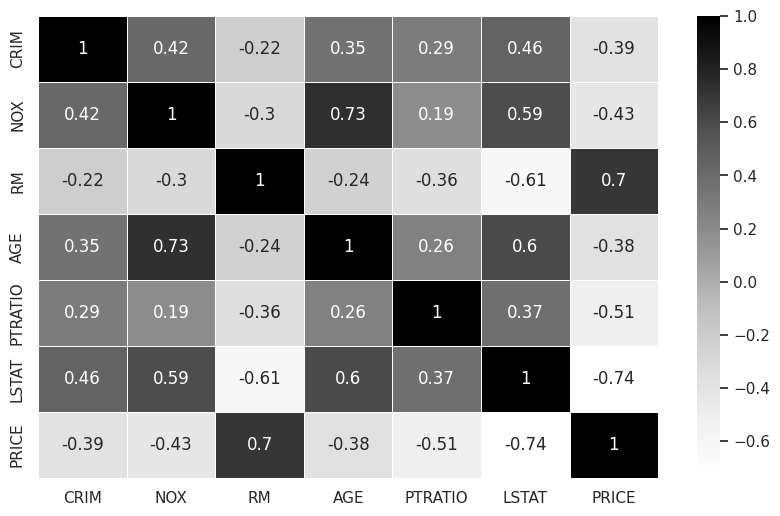

In [6]:
#heatmap first to indicate some relationships
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

print("correlacion")
sns.heatmap(
    df.corr(),
    linewidths=.5,
    annot=True,
     cmap='Greys'
)

plt.show()



- Podemos notar una relación considerable entre el numero de promedio de habitaciones por vivienda (RM) y el valor promedio de viviendas (PRICE)

- Existe una relación entre el valor promedio de viviendas (PRICE) y el % de menor nivel económico de la población (LSTAT)

- Existe una relación entre el valor promedio de viviendas (PRICE) y la proporción de alumnos por profesor por ciudad (PTRATIO)



2) Seleccionen las columnas para la matriz de características (X) y seleccionen el PRECIO para el vector objetivo (y).

In [8]:
#Dividan
cols = ['RM','PTRATIO', 'LSTAT']
X = df[cols]
y = df['PRICE']

3) Dividan los datos en grupos de entrenamiento y de prueba. ¡Usen el número 42 para la consistencia!

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

4) Instancien el modelo y ajústenlo al conjunto de entrenamiento.

In [12]:
reg = LinearRegression() #instanciando el modelo
reg.fit(X_train, y_train) #ajustando el modelo

LinearRegression()

In [14]:
#predicciones
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

5) Evaluar el modelo de rendimiento en el conjunto de entrenamiento y de prueba usando la puntuación R^2.  ¿Existe alguna diferencia entre el modelo de rendimiento en los datos de entrenamiento vs. los datos de prueba?

In [15]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

print(f"r2 train: {r2_train}")
print(f"r2 test:  {r2_test}")

r2 train: 0.6877966145058925
r2 test:  0.6331590458194678


6) Evalúen el modelo usando el error absoluto medio (EAM).

In [16]:
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)
print(mae_train)
print(mae_test)

3.714054057158005
3.3918448293813976


7) Evalúen el modelo usando el error cuadrático medio (ECM).  

In [18]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)
print(mse_train)
print(mse_test)

27.68673681796949
25.688824196675952


8) Evalúen el modelo de rendimiento usando RECM en el conjunto de entrenamiento y de prueba. Esta métrica es útil porque las unidades estarán en las mismas unidas del vector objetivo. En este caso mil dólares.  

In [20]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

5.261818774717492
5.068414367104958
